<H1>Exploratory Data Analysis</H1>

It is a approach in the field of machine learning for analyzing the given dataset. The given technique involves visualizing, taking out insights(summarizing) and also becoming familiar to the given datasets

<H1>Understanding the Dataset</H1>

The given dataset contains cases on the survival of patients who had undergone surgery for breast cancer.

Lets assume -
1. Age(1st Column)-Age of patients
2. Year(2nd Column)-Year of operation to remove the nodes
3. Nodes(3rd Column)-Number of positive axillary nodes detected
4. Survival Status(4th Column)- Status of the person.

   1 - the patient survived 5 years or long.<br>
   2 - the patient died within 5 years.

<H3>Importing the Libraries</H3>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<H3>Loading the Dataset</H3>

In [46]:
haberman = pd.read_csv(r"C:\Users\AKSHAT ANAND\Desktop\habermans survival data cience\haberman.csv",names=features)

<H3>Labelling of Data</H3>

In [47]:
features=['age','year','nodes','status']

<H3>Dataset Details</H3>

In [48]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [83]:


# Convert survival status 1 and 2 to #'Alive' and 'Died', respectively
haberman['status'] = haberman['status'].map({1:'alive', 2: 'died'})
# Printing first 5 lines of altered dataset
haberman.head()

,age,year,nodes,status
0,30,64,1,NaN
1,30,62,3,NaN
2,30,65,0,NaN
3,31,59,2,NaN
4,31,65,4,NaN


In [50]:
# Printing the number of rows and columns for the dataset
haberman.shape

(306, 4)

<H6>Observations:</H6><br>
The .csv file contains data from 306 patients stored in the rows and 4 columns describing the features of the data set.

In [51]:
# Details about the dataset
haberman.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


<H6>Observations:</H6><br>
There are no missing values in this data set.<br>
The 3 attributes are of int data type and the last attribute was converted to a categorical datatype.<br>
In the ‘status’ column, the initial int-type was mapped to ‘alive’, which means the patient survived beyond 5 years. And the value ‘2’ was mapped to ‘died’, which means the patient passed within 5 years.

In [52]:
# Statistically describe the dataset
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<h6>Observations:</h6><br>
Count: Total number of data points present in each respective column was 306.<br>
Mean: The average value for each column in respect to age, year and nodes.<br>
Std (Standard Deviation): The measurement of how far the group of values are spread out from the average (mean), or expected value.<br>
Min (Minimum): The minimum value present in each column.<br>
25% Quartile: 1/4th of the data points are below the provided value.<br>
50% Quartile: 1/2 of the data points are below the provided value.<br>
75% Quartile: 3/4th of the data points are below the provided value.<br>
Max (Maximum): The maximum value present per column.<br>

In [53]:
# Counting each type of status in the dataset
haberman["status"].value_counts()

alive    225
died      81
Name: status, dtype: int64

<H6>Observations:</H6><br>
The value_counts function details how many data points for each class are present. This code snippet describes how many patients survived and how many did not after a period of 5 years.<br>
Out of 306 patients, 225 survived and 81 did not live beyond 5 years i.e. died.

In [54]:
# Create a 'alive status' dataset to store 'Alive' values for the patients that survived
status_yes = haberman[haberman["status"] == 'alive']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [55]:
# Create a 'died status' dataset to store values for the patients that did not survive
status_no = haberman[haberman["status"] == 'died']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


<H6>Observations:</H6><br>

On Age: The difference between the mean age and year of died vs alive dataset isn’t statistically significant.There is however, a trend that describes a general increase in the age of the patients who did not survive surgery after 5 years. This increase can be seen in the minimum age, the percent quartiles and the maximum age of the non-survived patients.<br>

On Year: The difference between the mean year and of the died vs alive dataset isn’t statistically significant.<br>

On Nodes: There is a noticeable increase in the mean number of nodes found for the ‘alive dataset’ and the ‘died dataset’. There is also an increase in the maximum number of nodes found in the ‘died dataset’. The percent quartiles were also higher for the no dataset than the yes dataset.

<H6>Model Insight:</H6><br>
On average, those who survived have about <h7><U>2.5 times</U></H7> less nodes than those who did not survive. For those who survived they held an average of <h7><U>2.79</U></H7> nodes versus the 7.46 nodes for the patients that did not survive.

<H1>Univariate Analysis</H1>

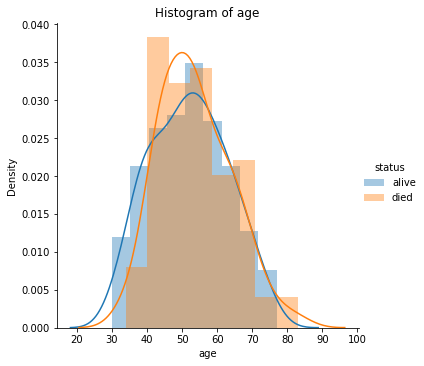

In [61]:
# Create a function for PDF analysis
sns.FacetGrid(haberman, hue = "status", size = 5).map(sns.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

<H6>Observations:</H6><br>

1.Major overlapping is observed, which suggests that<U> age isn’t a </U>major determining factor in the patients likihood of survival.<br>

2.Differences between the age of the alive and died dataset are barely observable given the amount of overlap in the PDF(Proability Density Functions).

<H6>Model Insights:</H6>
    <br>
Ages 30–40 had a higher chance of survival, whereas ages 40–60 did not. For ages 60+ the chances of survival were about 50/50.

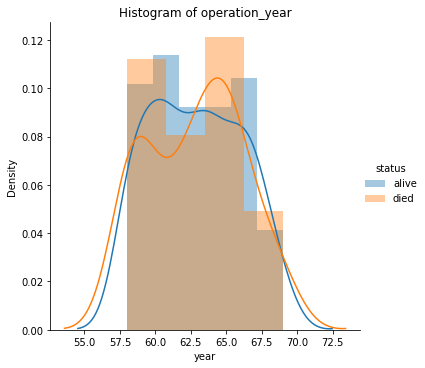

In [64]:
# PDF histogram for year v. status 

sns.FacetGrid(haberman, hue = "status", size = 5). map(sns.distplot, "year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

<H6>Observations:</H6><br>
Major overlapping continues again suggesting that the year of the patient’s surgical procedure did not affect their survival rate/outcome after 5 years.<br>

There was a spike in the death rate for patients whose surgery was in year 1965 and a decrease for procedures done in 1960.<br>

Patient’s likelihood of survival was up between 1960–1962

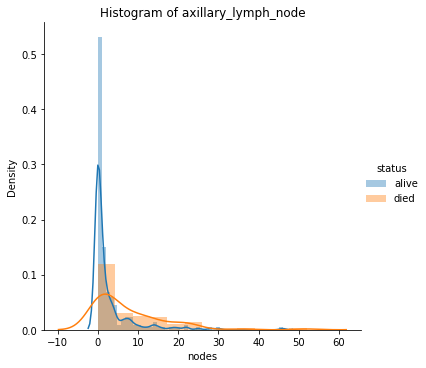

In [66]:
# PDF histogram for nodes v. status
sns.FacetGrid(haberman, hue = "status", size = 5).map(sns.distplot, "nodes").add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

<H6>Observations:</H6><br>

Complete separation would be ideal to distinguish the exact number of nodes for patients who survived.
<br>
Patients with 0 nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.
<br>
This plot has shown that the number of nodes seem to influence the survival rate of patients more so than age and year of operation.
<br>
<H6>Model Insight:</H6><br>

Patient non-survival increasingly likely after 5 nodes.

<H1>Cumulative Distribution Function</H1>

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
---------------------------------------------------------
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568] [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


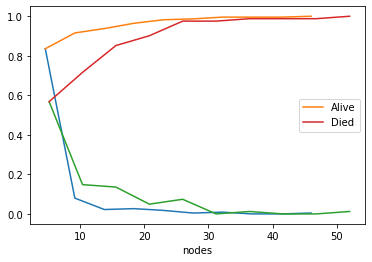

In [68]:
# CDF analysis 
count1, bin_edges1 = np.histogram(status_yes['nodes'], bins = 10, density = True)
pdf1 = count1/(sum(count1))
print(pdf1, bin_edges1);
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Alive')
plt.xlabel('nodes')
print("---------------------------------------------------------")
count2, bin_edges2 = np.histogram(status_no['nodes'], bins = 10, density = True)
pdf2 = count2/(sum(count2))
print(pdf2, bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'Died')
plt.xlabel('nodes')
plt.legend()
plt.show()

<H6>Observations:</H6><br>
Approximately 83.55% of patients who survived had nodes in the 0 to 4.6 range as per the CDF summary stats.

<H1>Box & Whisker Plots and Violin Plots</H1>

A box and whisker plot also called a box plot displays the five-number summary of a set of data. The summary is the minimum, first quartile, median, third quartile, and maximum. It extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. It also contains the outliers.


<Figure size 432x288 with 0 Axes>

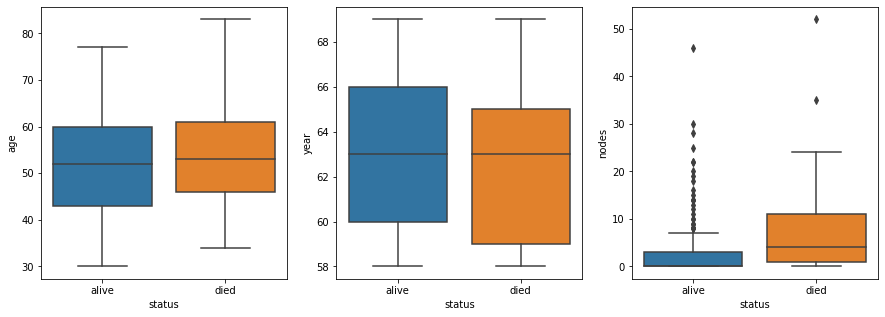

In [69]:
# Create box and whisker plot for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.boxplot(x = 'status', y = 'age', data = haberman)
plt.subplot(132)
sns.boxplot(x = 'status', y = 'year', data = haberman)
plt.subplot(133)
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.show()

Violin plot is the combination of a box plot and probability density function (CDF). Violin Plots allow to visualize the distribution of a numeric variable for one or several groups. It’s a close form of the boxplot, but allows a deeper understanding of the density.

<Figure size 432x288 with 0 Axes>

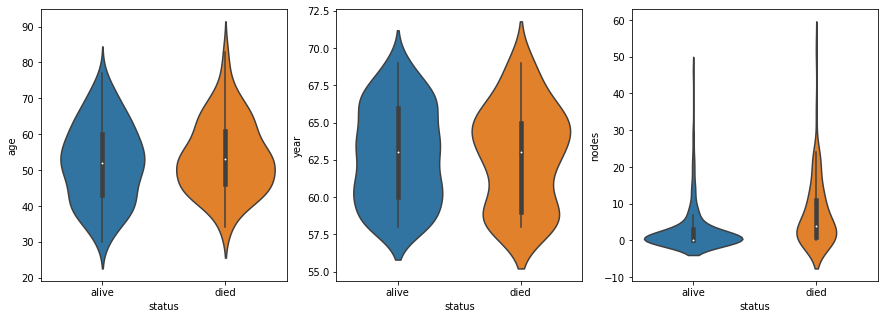

In [71]:
# Create violin plots for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.violinplot(x = "status",y = "age",data = haberman,height = 10)
plt.subplot(132)
sns.violinplot(x = "status",y = "year",data = haberman,height = 10)
plt.subplot(133)
sns.violinplot(x = "status",y = "nodes",data = haberman,height = 10)
plt.show()

<H6>Observations:</H6><br>

There were comparatively more people in the age group 45 to 65 who did not survive. However, patient age alone is not an important parameter in determining their survival.
<br><br>
There were more people operated on in the year 1965 that did not survive beyond 5 years.<br> <br>
Patients with more than 1 node are less likely to survive. Generally, more nodes hint toward a decreased survival rate.<br> <br>
A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had 0 positive axillary nodes, who died within 5 years of operation, thus an absence of positive axillary nodes cannot guarantee survival.
<br> <br>


<h1>Bivariate Analysis</h1>

<h6>Scatter Plots</h6>

A scatter plot reveals relationships or association between two variables. Such relationships manifest themselves by any non-random structure in the plot.

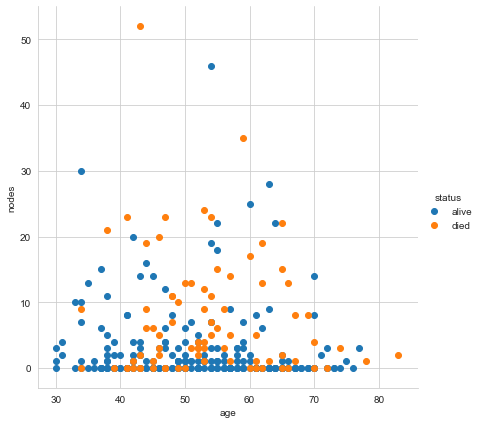

In [73]:
# Create scatter plot of age v nodes
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = "status", height = 6)\
.map(plt.scatter, "age", "nodes")\
.add_legend()
plt.show()

<h6>Observations:</h6><br>

Patients with 0 to 15 nodes aged between 30 and 40 are more likely to survive.<br>
Irrespective of age patients with 0 to 1 nodes are more likely to survive.<br>
Patients aged 50+ with 5+ nodes are more likely to have not survived.<br>

<h6>Pair Plots</h6>

The Pair plot is used to understand the best set of features to explain a relationship between two variables/dimensions or to form the most separated clusters

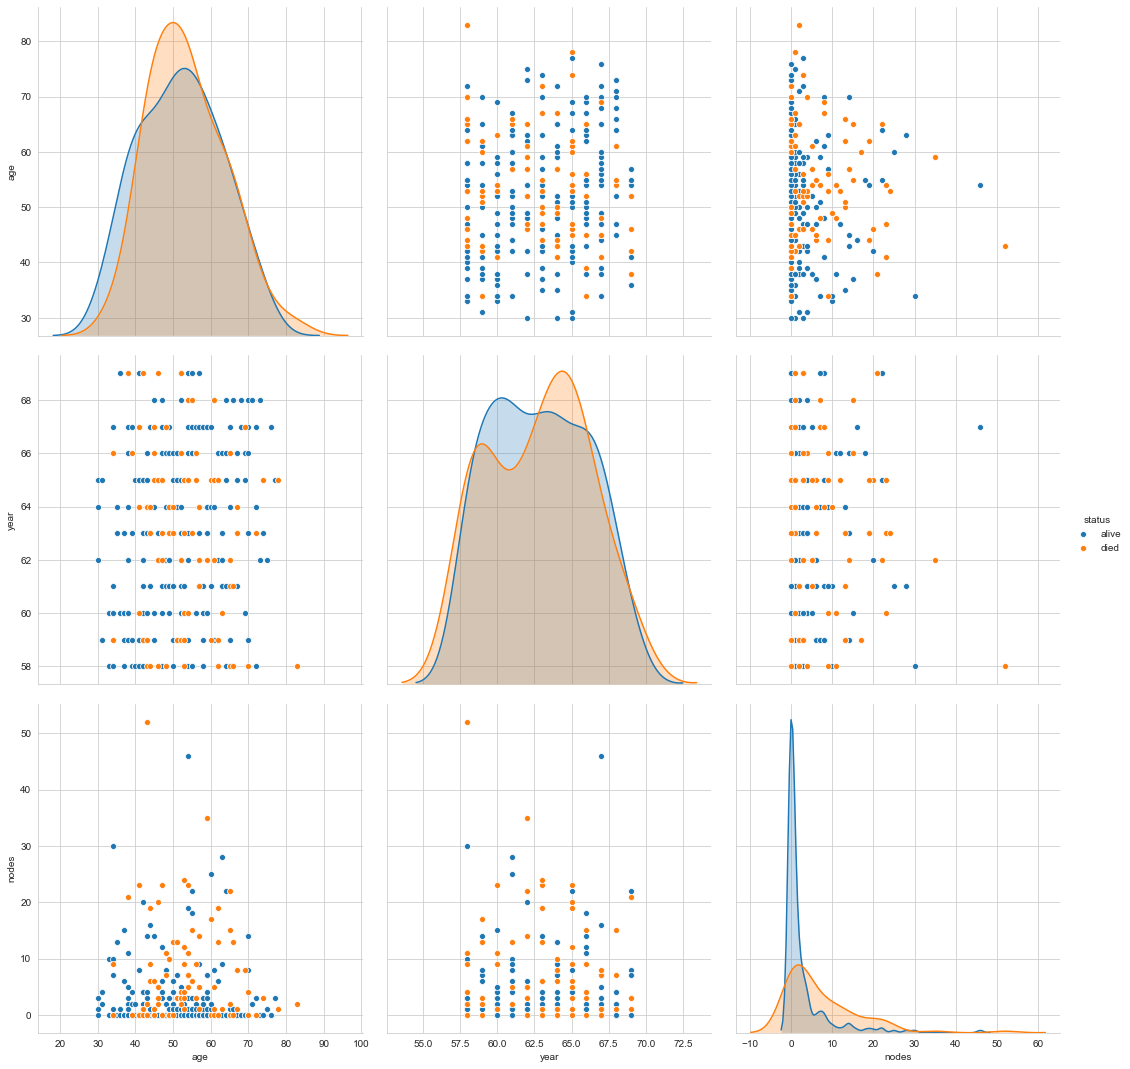

In [74]:
# Create pair-plot to determine a possible relationship between the columns / attributes
sns.set_style("whitegrid")
sns.pairplot(haberman, hue = "status", height = 5)
plt.show()

<h6>Observations:</h6><br>

In the pair-plot between age vs nodes, class variables can be differentiated between each other with two overlapping bell-shaped curves.<br>
For further analysis age and nodes attributes can be considered for pattern finding as you can determine, however vaguely, a relationship.<br>
However, all other attributes did not show much difference in their PDF.<br>

<H1>Multivariate Analysis</H1>

Multivariate analysis is the statistical investigation of many variables at once. 

<h6>Contour Plots</h6><br>
A contour plot is a graphical technique for representing a 3D surface by plotting constant z slices, called contours, on a 2D format. 

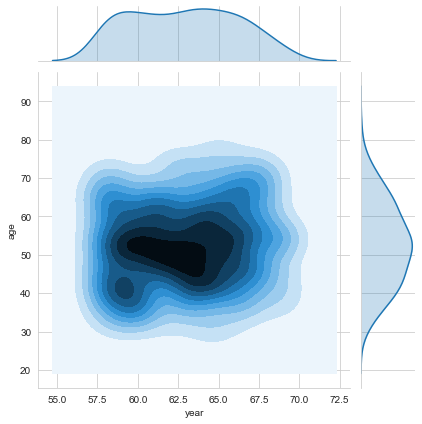

In [75]:
# Create contour plot for the cross section of 3D graph
sns.jointplot(x = "year", y = "age", data = haberman, kind = "kde")
plt.show()

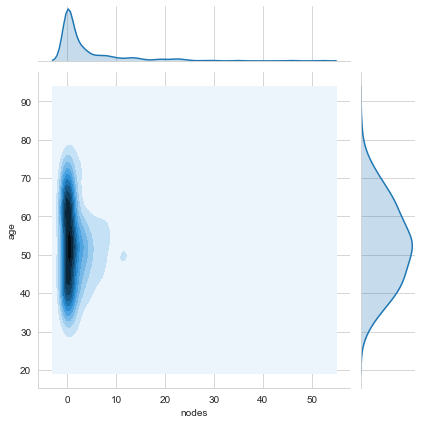

In [76]:
# Create contour plot for the cross section of 3D graph
sns.jointplot(x = "nodes", y = "age", data = haberman, kind = "kde")
plt.show()

<h6>Observations:</h6><br>
From about 1960 to 1964, there were more surgical procedures completed on the patients between the ages 45 and 55.<br>
The majority of patients with 0 to 1 nodes were between 45 to 65 years of age

<h1>Model Insight Outline</h1>

In [79]:
#Create a simple Survival Prediction Model with if/else statements 
def survivalModel(age, nodes):
    
    if nodes in range(0, 4):            
        if age in range(30, 41): 
            print('Survival rate is approximately 90%')
            
        else:
            print('Survival rate is approximately 74%')
            
    elif nodes in range(4, 7):              
        if age in range(30, 51):
            print('Survival rate is approximately 75%')
        else:
            print('Survival rate approximately 47%')
    elif nodes >= 7:              
        if age in range(30, 51):
            print('Survival rate is approximately 54%')
            
        else:
            print('Survival rate is approximately 40%')

In [80]:
survivalModel(32,2)

Survival rate is approximately 90%


In [82]:
survivalModel(47,5)

Survival rate is approximately 75%
